# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Benedict Brian Joel Purba]
- **Email:** [benedictjoelpurba20@gmail.com]
- **ID Dicoding:** [Benedict Brian Joel Purba]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi harga produk dan bagaimana hubungan antara harga dan biaya pengiriman?
- Bagaimana distribusi jumlah pesanan per bulan, dan apakah ada tren musiman dalam volume pesanan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [69]:
dataset_dir = '""C:\JOEL\DICODING\E-commerce-public-dataset.zip""'

# Path untuk masing-masing dataset
customers_path = os.path.join(dataset_dir, 'customers_dataset.csv')
geolocation_path = os.path.join(dataset_dir, 'geolocation_dataset.csv')
order_items_path = os.path.join(dataset_dir, 'order_items_dataset.csv')
order_payments_path = os.path.join(dataset_dir, 'order_payments_dataset.csv')
order_reviews_path = os.path.join(dataset_dir, 'order_reviews_dataset.csv')
orders_path = os.path.join(dataset_dir, 'orders_dataset.csv')
product_category_path = os.path.join(dataset_dir, 'product_category_name_translation.csv')
products_path = os.path.join(dataset_dir, 'products_dataset.csv')
sellers_path = os.path.join(dataset_dir, 'sellers_dataset.csv')

### Assessing Data

In [70]:
customers_df = pd.read_csv("customers_dataset.csv")
geolocation_df = pd.read_csv("geolocation_dataset.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
orders_df = pd.read_csv("orders_dataset.csv")
product_category_df = pd.read_csv("product_category_name_translation.csv")
products_df = pd.read_csv("products_dataset.csv")
sellers_df = pd.read_csv("sellers_dataset.csv")

### Cleaning Data

In [71]:
# Example Cleaning: Menghapus duplikasi dan menangani missing values
customers_df.drop_duplicates(inplace=True)
geolocation_df.drop_duplicates(inplace=True)
order_items_df.drop_duplicates(inplace=True)
order_payments_df.drop_duplicates(inplace=True)
order_reviews_df.drop_duplicates(inplace=True)
orders_df.drop_duplicates(inplace=True)
product_category_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
sellers_df.drop_duplicates(inplace=True)




## Exploratory Data Analysis (EDA)

### Explore ...

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling for plots
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [73]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


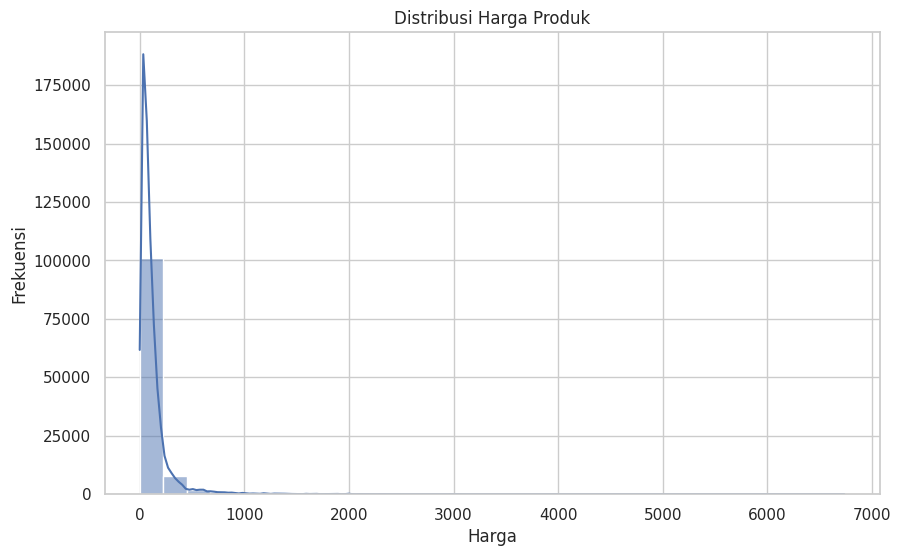

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(order_items_df['price'], kde=True, bins=30)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

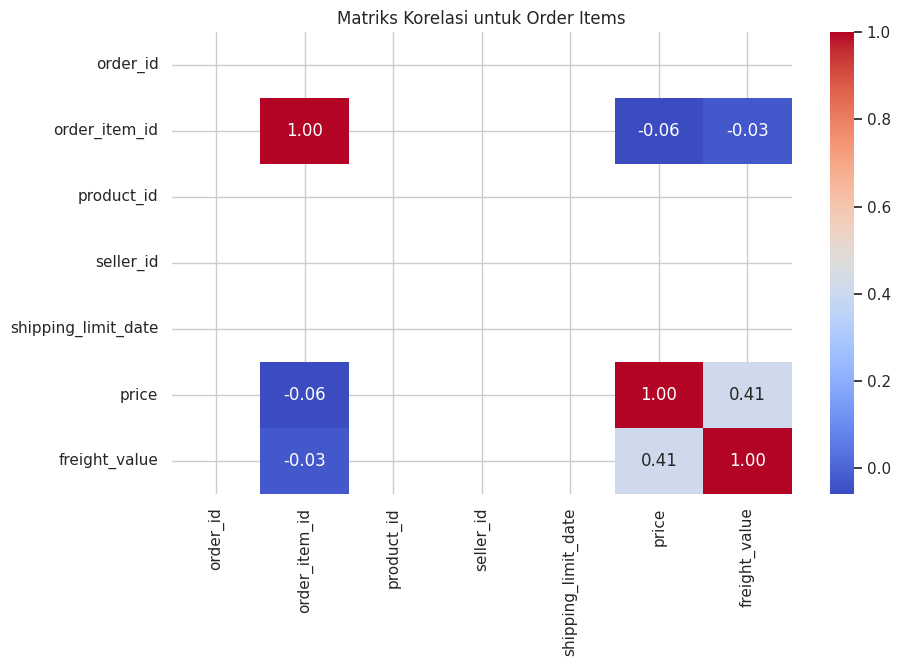

In [76]:
for col in order_items_df.columns:
    if order_items_df[col].dtype == 'object':  # Check if column is of object type (likely string)
        try:
            order_items_df[col] = pd.to_numeric(order_items_df[col], errors='coerce')
            # Attempt conversion, replace non-convertible values with NaN
        except:
            pass  # Skip if conversion fails

plt.figure(figsize=(10, 6))
sns.heatmap(order_items_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriks Korelasi untuk Order Items')
plt.show()

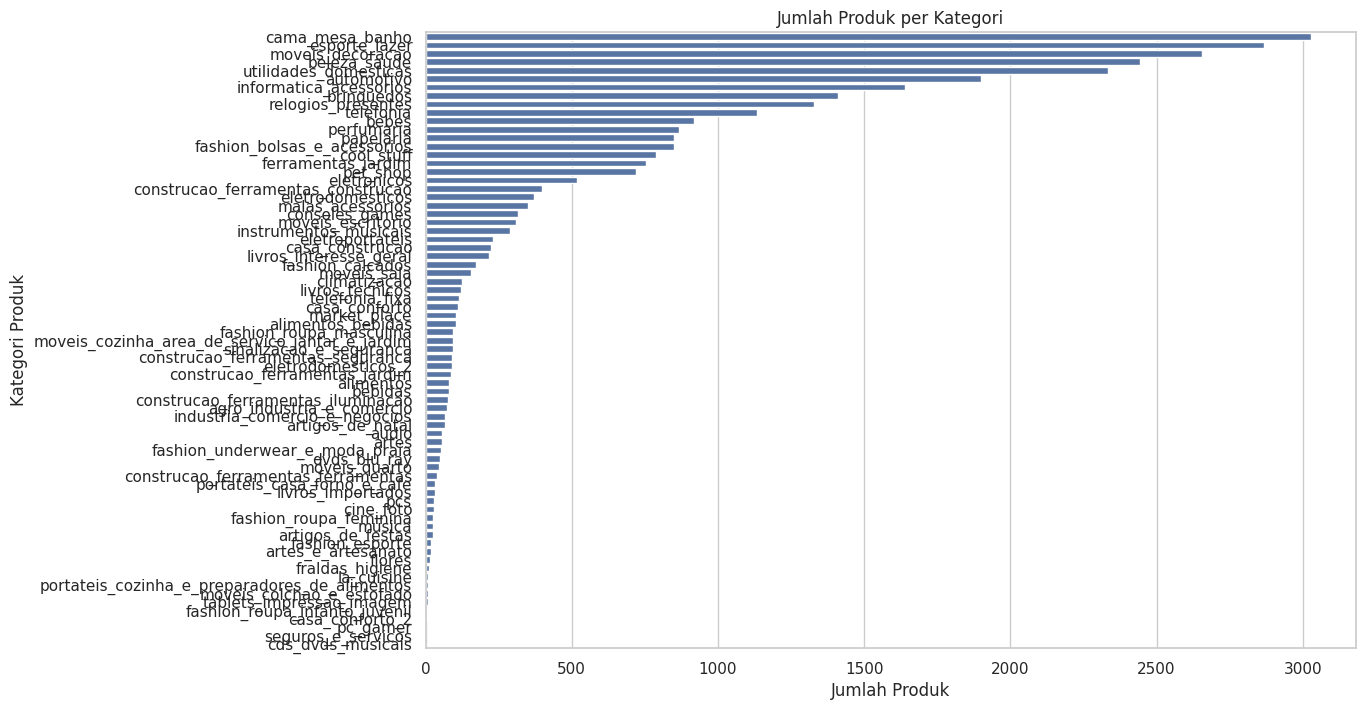

In [77]:
product_count_by_category = products_df['product_category_name'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=product_count_by_category.values, y=product_count_by_category.index)
plt.title('Jumlah Produk per Kategori')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori Produk')
plt.show()

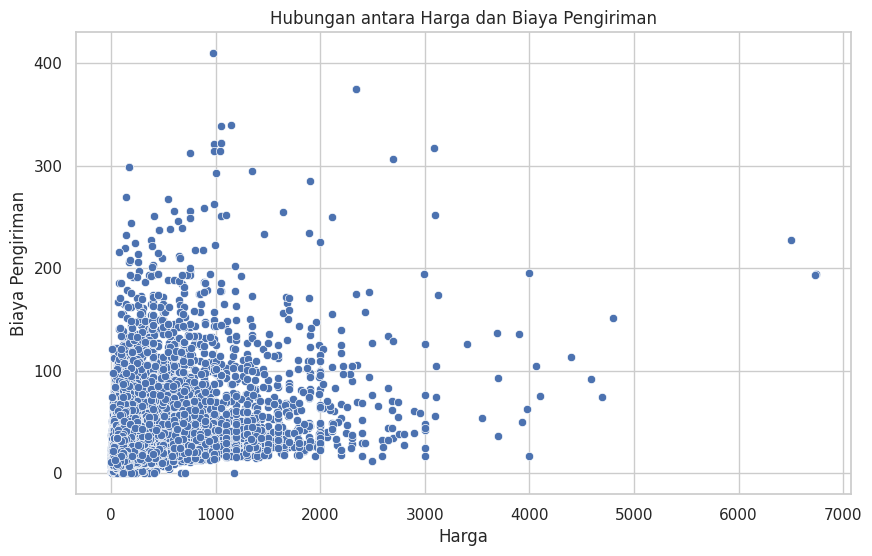

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', data=order_items_df)
plt.title('Hubungan antara Harga dan Biaya Pengiriman')
plt.xlabel('Harga')
plt.ylabel('Biaya Pengiriman')
plt.show()

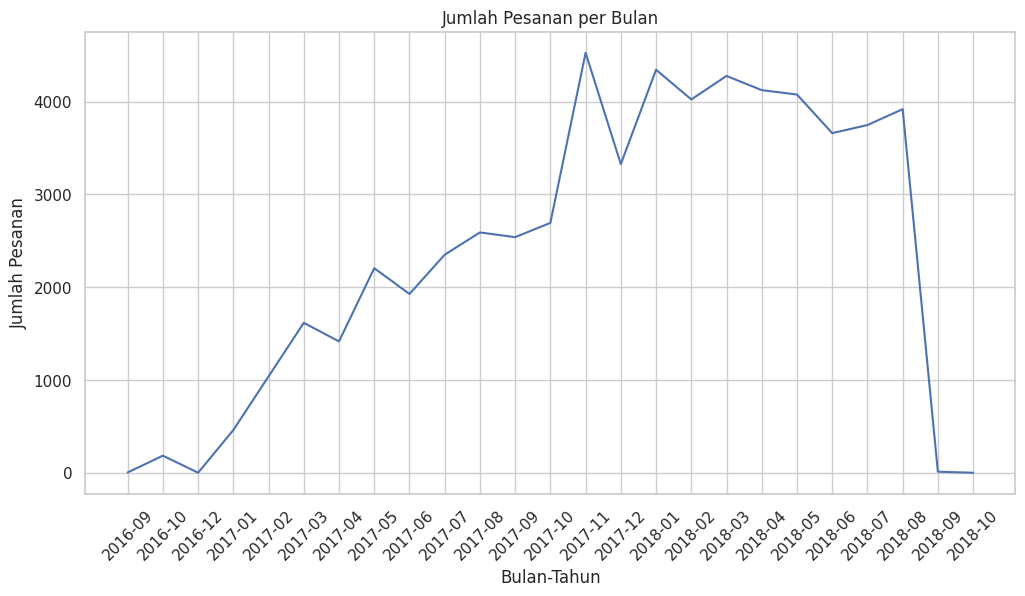

In [79]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Ekstrak bulan dan tahun dari timestamp
orders_df['month_year'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Jumlah pesanan per bulan
orders_per_month = orders_df['month_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_per_month.index.astype(str), y=orders_per_month.values)
plt.title('Jumlah Pesanan per Bulan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

<ipython-input-80-2b488fe449d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=order_reviews_df, palette='viridis')


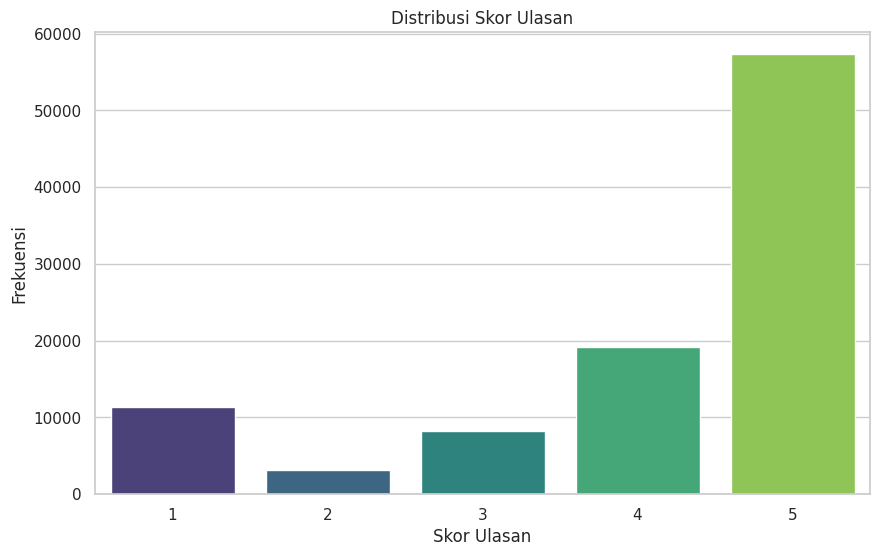

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=order_reviews_df, palette='viridis')
plt.title('Distribusi Skor Ulasan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Frekuensi')
plt.show()

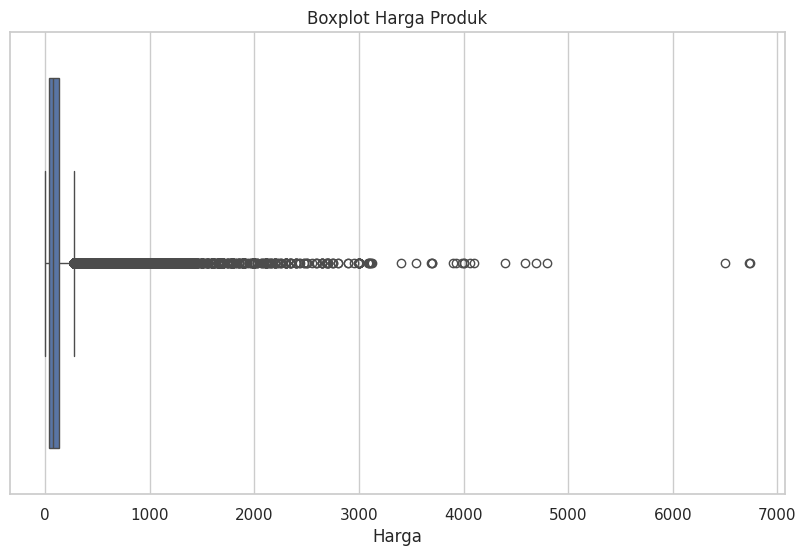

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=order_items_df['price'])
plt.title('Boxplot Harga Produk')
plt.xlabel('Harga')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

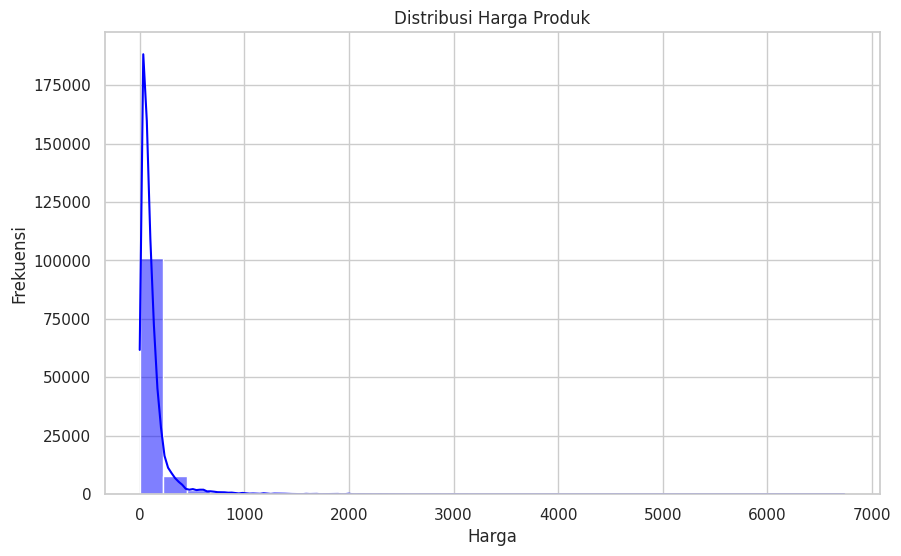

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(order_items_df['price'], kde=True, bins=30, color='blue')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

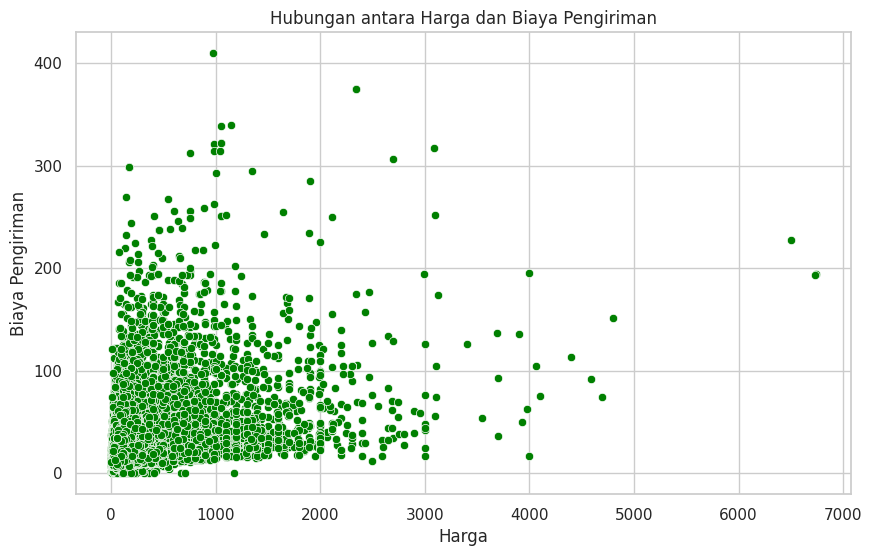

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', data=order_items_df, color='green')
plt.title('Hubungan antara Harga dan Biaya Pengiriman')
plt.xlabel('Harga')
plt.ylabel('Biaya Pengiriman')
plt.show()

### Pertanyaan 2:

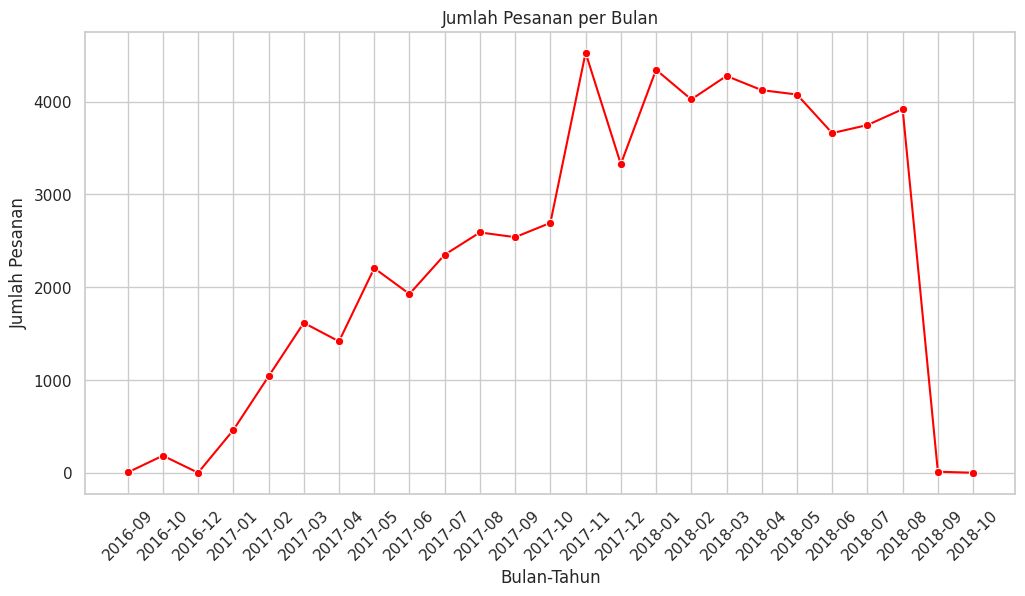

In [84]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Ekstrak bulan dan tahun dari timestamp
orders_df['month_year'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Jumlah pesanan per bulan
orders_per_month = orders_df['month_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_per_month.index.astype(str), y=orders_per_month.values, marker='o', color='red')
plt.title('Jumlah Pesanan per Bulan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Bagaimana distribusi harga produk dan bagaimana hubungan antara harga dan biaya pengiriman?
- Bagaimana distribusi jumlah pesanan per bulan, dan apakah ada tren musiman dalam volume pesanan?

- Dengan diketahuinya distribusi harga produk ini dapat menunjukkan produk dengan harga rendah dan tinggi. Dari situ juga dapat diketahui produk yang berkualitas dengan harga yang tinggi dan rendah. Sehingga produk yang lebih mahal dikenakan biaya pengiriman yang tinggi dan sebaliknya.
- Dengan adanya grafik distribusi jumlah pesanan per bulan maka kita mengetahui puncak penjualannya pada 2017-11, sehingga terdapat tren musimannya. Tren musiman ini dapat digunakan untuk membuat strategi pemasaran dll.